## Data exploration for Climate Data
Data from https://data.open-power-system-data.org/weather_data/

In [3]:
import pandas as pd

df = pd.read_json("data/enlil/enlil_time_series.json")
#df= pd.read_csv("./data/weather_data.csv")
print(df.columns)
countries = list(dict.fromkeys([x[:2] for x in df.columns]))[1:]
features = list(dict.fromkeys([x[3:] for x in df.columns]))[1:]
print(len(countries), "countries", countries)
print(len(features), "features", features)
df.head()

Index(['utc_timestamp', 'AT_temperature', 'AT_radiation_direct_horizontal',
       'AT_radiation_diffuse_horizontal', 'BE_temperature',
       'BE_radiation_direct_horizontal', 'BE_radiation_diffuse_horizontal',
       'BG_temperature', 'BG_radiation_direct_horizontal',
       'BG_radiation_diffuse_horizontal', 'CH_temperature',
       'CH_radiation_direct_horizontal', 'CH_radiation_diffuse_horizontal',
       'CZ_temperature', 'CZ_radiation_direct_horizontal',
       'CZ_radiation_diffuse_horizontal', 'DE_temperature',
       'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal',
       'DK_temperature', 'DK_radiation_direct_horizontal',
       'DK_radiation_diffuse_horizontal', 'EE_temperature',
       'EE_radiation_direct_horizontal', 'EE_radiation_diffuse_horizontal',
       'ES_temperature', 'ES_radiation_direct_horizontal',
       'ES_radiation_diffuse_horizontal', 'FI_temperature',
       'FI_radiation_direct_horizontal', 'FI_radiation_diffuse_horizontal',
       '

,utc_timestamp,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,...,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
0,1980-01-01T00:00:00Z,-3.640,0.0,0.0,-0.720,0.0,0.0,4.664,0.0,0.0,...,0.0,-3.945,0.0,0.0,-3.055,0.0,0.0,-4.648,0.0,0.0
1,1980-01-01T01:00:00Z,-3.803,0.0,0.0,-1.165,0.0,0.0,4.052,0.0,0.0,...,0.0,-4.053,0.0,0.0,-3.272,0.0,0.0,-4.554,0.0,0.0
2,1980-01-01T02:00:00Z,-3.969,0.0,0.0,-1.434,0.0,0.0,3.581,0.0,0.0,...,0.0,-4.129,0.0,0.0,-3.639,0.0,0.0,-4.455,0.0,0.0
3,1980-01-01T03:00:00Z,-4.076,0.0,0.0,-1.843,0.0,0.0,3.197,0.0,0.0,...,0.0,-4.139,0.0,0.0,-4.202,0.0,0.0,-4.421,0.0,0.0
4,1980-01-01T04:00:00Z,-4.248,0.0,0.0,-2.094,0.0,0.0,2.750,0.0,0.0,...,0.0,-4.239,0.0,0.0,-4.732,0.0,0.0,-4.449,0.0,0.0


In [4]:
time_col = 'utc_timestamp'
print(df[time_col].min())
print(df[time_col].max())
time_tags = [pd.to_datetime(d) for d in df[time_col]]

1980-01-01T00:00:00Z
2019-12-31T23:00:00Z


In [11]:
def get_cm_per_country(df, time_col, country, feature='temperature'):
    df = df[[time_col, country+'_'+feature]]
    df['date']=df.apply(lambda x: pd.to_datetime(x[time_col]).date(), axis=1)
    df['time']=df.apply(lambda x: pd.to_datetime(x[time_col]).time(), axis=1)
    df = df[['date', 'time', country+'_'+feature]]
    df = df.pivot(index='date', columns='time')
    df.columns = df.columns.droplevel(0)
    df.columns = [country+'_'+feature+'_'+ str(i) for i in df.columns]
    corr_matrix = df.corr()
    #return df
    return corr_matrix
ex = get_cm_per_country(df, time_col, 'DE')
ex.head()

/tmp/ipykernel_1141740/2785660624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=df.apply(lambda x: pd.to_datetime(x[time_col]).date(), axis=1)
/tmp/ipykernel_1141740/2785660624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time']=df.apply(lambda x: pd.to_datetime(x[time_col]).time(), axis=1)


,DE_temperature_00:00:00,DE_temperature_01:00:00,DE_temperature_02:00:00,DE_temperature_03:00:00,DE_temperature_04:00:00,DE_temperature_05:00:00,DE_temperature_06:00:00,DE_temperature_07:00:00,DE_temperature_08:00:00,DE_temperature_09:00:00,...,DE_temperature_14:00:00,DE_temperature_15:00:00,DE_temperature_16:00:00,DE_temperature_17:00:00,DE_temperature_18:00:00,DE_temperature_19:00:00,DE_temperature_20:00:00,DE_temperature_21:00:00,DE_temperature_22:00:00,DE_temperature_23:00:00
DE_temperature_00:00:00,1.000000,0.999676,0.998797,0.997623,0.995639,0.991673,0.984948,0.975567,0.966380,0.958174,...,0.933401,0.933009,0.937305,0.943844,0.950680,0.953349,0.953123,0.952330,0.951025,0.949214
DE_temperature_01:00:00,0.999676,1.000000,0.999708,0.998962,0.996683,0.991777,0.983881,0.973408,0.963428,0.954725,...,0.929283,0.928904,0.933442,0.940553,0.948195,0.951499,0.951646,0.951209,0.950263,0.948783
DE_temperature_02:00:00,0.998797,0.999708,1.000000,0.999719,0.997257,0.991583,0.982713,0.971325,0.960671,0.951549,...,0.925596,0.925264,0.930024,0.937641,0.946013,0.949897,0.950384,0.950272,0.949651,0.948473
DE_temperature_03:00:00,0.997623,0.998962,0.999719,1.000000,0.998041,0.992078,0.982606,0.970445,0.959094,0.949512,...,0.923112,0.922933,0.928087,0.936417,0.945431,0.949505,0.950197,0.950335,0.949956,0.948999
DE_temperature_04:00:00,0.995639,0.996683,0.997257,0.998041,1.000000,0.997040,0.989208,0.977446,0.965334,0.955000,...,0.928415,0.928940,0.935623,0.945721,0.954062,0.956086,0.956282,0.956154,0.955453,0.954164


/tmp/ipykernel_1141740/2785660624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=df.apply(lambda x: pd.to_datetime(x[time_col]).date(), axis=1)
/tmp/ipykernel_1141740/2785660624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time']=df.apply(lambda x: pd.to_datetime(x[time_col]).time(), axis=1)


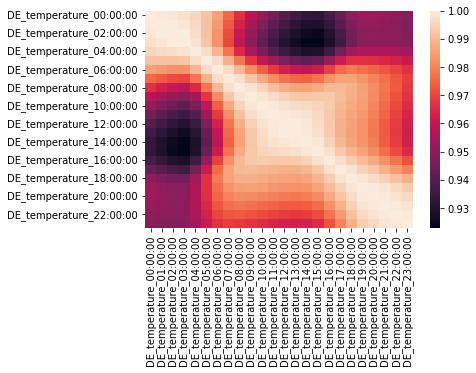

In [16]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = get_cm_per_country(df, time_col, 'DE')
sn.heatmap(corr_matrix)
plt.show()


/tmp/ipykernel_1141740/2785660624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=df.apply(lambda x: pd.to_datetime(x[time_col]).date(), axis=1)
/tmp/ipykernel_1141740/2785660624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time']=df.apply(lambda x: pd.to_datetime(x[time_col]).time(), axis=1)
/tmp/ipykernel_1141740/2785660624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

<AxesSubplot:>

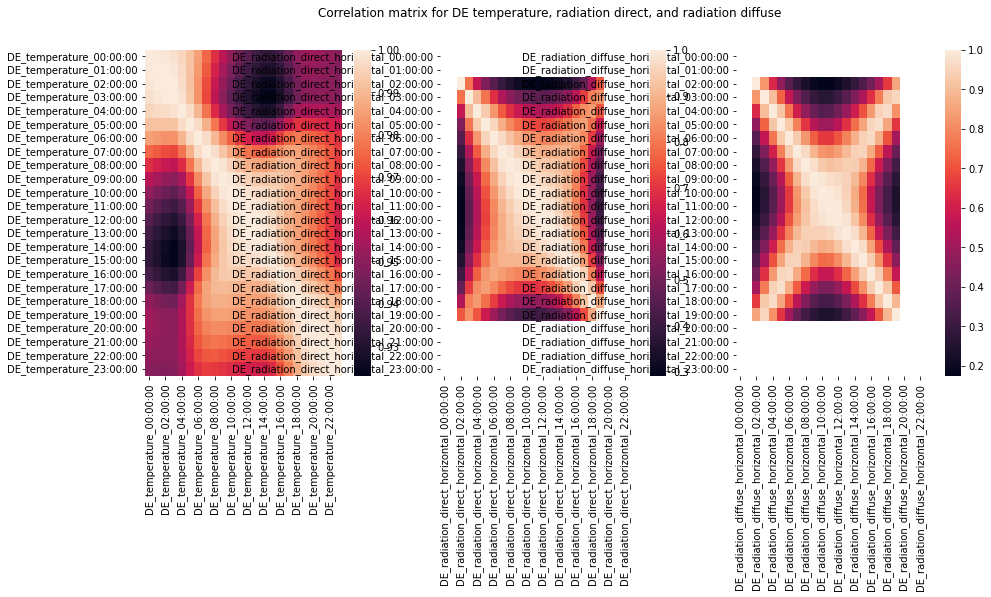

In [17]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Correlation matrix for DE temperature, radiation direct, and radiation diffuse')

corr_matrix_1 = get_cm_per_country(df, time_col, 'DE', features[0])
sn.heatmap(corr_matrix_1, ax=ax1)

corr_matrix_2 = get_cm_per_country(df, time_col, 'DE', features[1])
sn.heatmap(corr_matrix_2, ax=ax2)

corr_matrix_3 = get_cm_per_country(df, time_col, 'DE', features[2])
sn.heatmap(corr_matrix_3, ax=ax3)

/tmp/ipykernel_1141740/2785660624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=df.apply(lambda x: pd.to_datetime(x[time_col]).date(), axis=1)
/tmp/ipykernel_1141740/2785660624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time']=df.apply(lambda x: pd.to_datetime(x[time_col]).time(), axis=1)
/tmp/ipykernel_1141740/2785660624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

<AxesSubplot:>

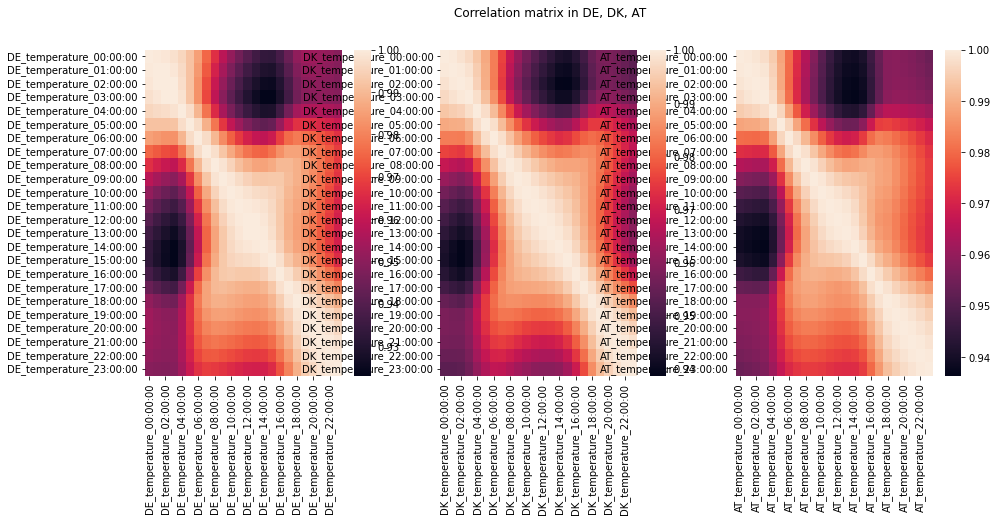

In [18]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Correlation matrix in DE, DK, AT')

corr_matrix_1 = get_cm_per_country(df, time_col, 'DE', features[0])
sn.heatmap(corr_matrix_1, ax=ax1)

corr_matrix_2 = get_cm_per_country(df, time_col, 'DK', features[0])
sn.heatmap(corr_matrix_2, ax=ax2)

corr_matrix_3 = get_cm_per_country(df, time_col, 'AT', features[0])
sn.heatmap(corr_matrix_3, ax=ax3)

In [ ]:
import math
import matplotlib.pyplot as plt
from time import time

#@jit(target_backend='cuda')
def show_corr_plots_per_country(countries):
    ncols= 3
    nrows= math.ceil(len(countries)/3)
    fig, axes = plt.subplots(figsize=(10*ncols, 4*nrows), ncols=ncols, nrows=nrows)
    fig.subplots_adjust(hspace=1)
    axes = axes.ravel()

    for i, country in enumerate(countries):
        corr_matrix_1 = get_cm_per_country(df, time_col, country, features[1])
        sn.heatmap(corr_matrix_1, ax=axes[i])
    fig.savefig(f"./plots/correlation_weather_data/corr_{features[1]}.jpg")
start = time()
show_corr_plots_per_country(countries)
print("with GPU:", time()-start)

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

#@jit(target_backend='cuda')
def show_corr_plots_per_country_2(countries):
    ncols= 3
    nrows= math.ceil(len(countries)/3)
    fig, axes = plt.subplots(figsize=(10*ncols, 4*nrows), ncols=ncols, nrows=nrows)
    fig.subplots_adjust(hspace=1)
    axes = axes.ravel()

    for i, country in enumerate(countries):
        corr_matrix_1 = get_cm_per_country(df, time_col, country, features[2])
        sn.heatmap(corr_matrix_1, ax=axes[i])
    fig.savefig(f"./plots/correlation_weather_data/corr_{features[2]}.jpg")
start = time()
show_corr_plots_per_country_2(countries)
print("with GPU:", time()-start)

In [1]:
from numba import jit, cuda
import numpy as np
# to measure exec time
from timeit import default_timer as timer

# normal function to run on cpu
def func(a):
    for i in range(10000000):
        a[i]+= 1

# function optimized to run on gpu
@jit(target_backend='cuda')
def func2(a):
    for i in range(10000000):
        a[i]+= 1
if __name__=="__main__":
    n = 10000000
    a = np.ones(n, dtype = np.float64)

    start = timer()
    func(a)
    print("without GPU:", timer()-start)

    start = timer()
    func2(a)
    print("with GPU:", timer()-start)

/var/folders/d0/btmbyskx4t106_l2zghzln2w0000gn/T/ipykernel_3953/3993670282.py:12: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(target_backend='cuda')


without GPU: 2.0749062470000013
with GPU: 0.5676349359999975


In [15]:
pd.options.display.max_rows = 4000
(df == 0).astype(int).sum(axis=0)]

[utc_timestamp                           0
 AT_temperature                         10
 AT_radiation_direct_horizontal     153913
 AT_radiation_diffuse_horizontal    151931
 BE_temperature                          5
                                     ...  
 SI_radiation_direct_horizontal     158818
 SI_radiation_diffuse_horizontal    157959
 SK_temperature                         15
 SK_radiation_direct_horizontal     155942
 SK_radiation_diffuse_horizontal    154341
 Length: 85, dtype: int64]